# SLU03 | Visualization with Pandas and Matplotlib: Examples notebook
***

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading sample data

Our main objective for these exercises is to help a supermarket understand more about its sales through visualizations. To do this we are going to use a **modified version** of [Supermarket Sales dataset](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales).

The dataset contains sales information for several stores and is located at `data/supermarket_sales.csv`. It has the following fields:

>**`city`**: Location of supercenters   
>**`gender`**: Gender type of customer   
>**`product_line`**: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel   
>**`quantity`**: Number of products purchased by customer   
>**`total`**: Total price including tax.   
>**`date`**: Date of purchase (Record available from January 2019 to March 2019)   
>**`time`**: Purchase time (10am to 9pm)   
>**`payment`**: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)    
>**`tax`**: 5% tax payment of the purchase

There are multiple ways we can aggregate this data, and we will explore some of them.

In [2]:
supermarket_sales = pd.read_csv('data/supermarket_sales.csv', encoding='utf_8', sep=';')
rows, columns = supermarket_sales.shape
print(f'supermarket_sales:  {rows} records and {columns} fields.')
supermarket_sales.head()

supermarket_sales:  1000 records and 9 fields.


,city,gender,product_line,quantity,total,date,time,payment,tax
0,Yangon,Female,Health and beauty,7,548.9715,1/5/2019,13:08,Ewallet,26.1415
1,Naypyitaw,Female,Electronic accessories,5,80.2200,3/8/2019,10:29,Cash,3.8200
2,Yangon,Male,Home and lifestyle,7,340.5255,3/3/2019,13:23,Credit card,16.2155
3,Yangon,Male,Health and beauty,8,489.0480,1/27/2019,20:33,Ewallet,23.2880
4,Yangon,Male,Sports and travel,7,634.3785,2/8/2019,10:37,Ewallet,30.2085


## Setting up

- use matplotlib inline magic before parameter setting

In [3]:
# For these exercises we will use `matplotlib.pyplot` module. We will start by importing together with some ✨magic✨.

%matplotlib inline

***
## Plotting

### the scatterplot 
#### This will help us to see if thee is any correlation between the tax and the total columns. It should be, right!?

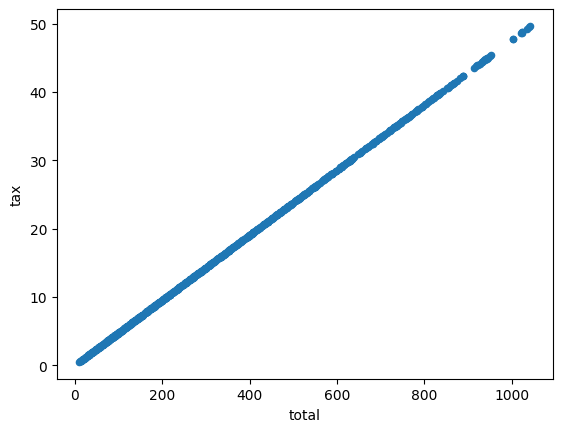

In [4]:
# code required to plot
supermarket_sales.plot.scatter(x='total', y='tax');


One assumption we can check is if our records with more units are the ones that have the highest value. In this case we want to know if **`total`** has a positive correlation with **`quantity`**.

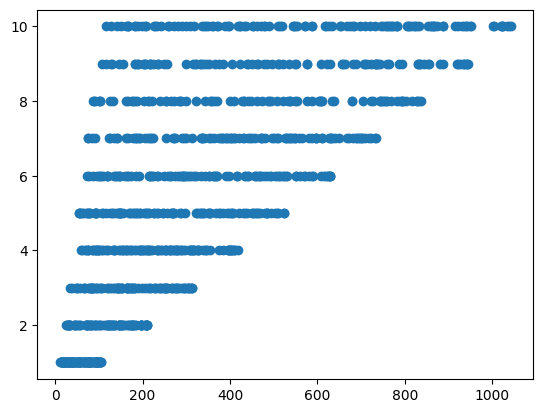

In [5]:
total = supermarket_sales.total
qty = supermarket_sales.quantity
plt.scatter(x=total, y=qty);

# Alternative Plot 1
# supermarket_sales.plot.scatter(x='total', y='quantity')

# Alternative Plot 2
# supermarket_sales.plot(x='total', y='quantity', kind='scatter')

### Line Chart

With a line chart we can see the trend of one (or many variables) over time (or evolution). 

In this case we have a time variable. We can investigate if there are trends and/or seasonalities now. Our time variable is date and the variable we want to investigate for trends and/or seasonalities is total.

In [6]:
sales_by_day = supermarket_sales.groupby('date', as_index=False)["total"].sum()
sales_by_day.head()

,date,total
0,1/1/2019,4745.1810
1,1/10/2019,3560.9490
2,1/11/2019,2114.9625
3,1/12/2019,5184.7635
4,1/13/2019,2451.2040


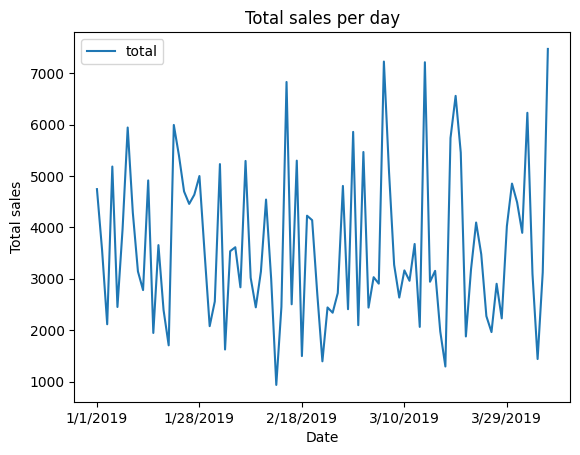

In [7]:
sales_by_day.plot.line(x='date', y='total')

# Alternative Plot 1
# date = sales_by_day.date
# total = sales_by_day.total
# plt.plot(date, total)

# Alternative Plot 2
#sales_by_day.plot(x='date', y='total')

plt.title('Total sales per day')
plt.xlabel('Date')
plt.ylabel('Total sales');

### Bar Chart

Bar charts are great to perform comparisons of discrete quantities among categorical variables. How should the plot be in the case we want the count of purchases by category of `unit_price`? Lets show you.

In [8]:
# We need to group first. 
purchases_by_unit_price = supermarket_sales.assign(unit_price = lambda d: (d['total'] / d['quantity']).round(-1))
purchases_by_unit_price = purchases_by_unit_price.groupby('unit_price', as_index=False)['total'].count()
purchases_by_unit_price = purchases_by_unit_price.rename(columns={'unit_price': 'unit_price_dozens'})
purchases_by_unit_price.head()

,unit_price_dozens,total
0,10.0,40
1,20.0,118
2,30.0,98
3,40.0,102
4,50.0,111


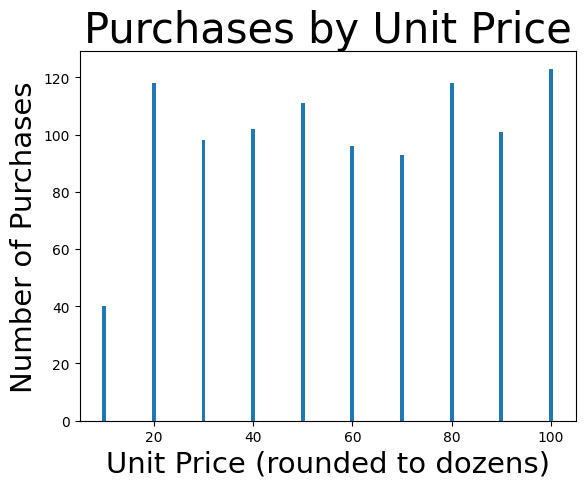

In [9]:
upd = purchases_by_unit_price.unit_price_dozens
total = purchases_by_unit_price.total
plt.bar(upd, total)

# purchases_by_unit_price.plot.bar(x='unit_price_dozens', y='total')

# Alternative Plot
# purchases_by_unit_price.plot(x='unit_price_dozens', y='total', kind='bar')

plt.xlabel('Unit Price (rounded to dozens)', size=21)
plt.ylabel('Number of Purchases', size=21)
plt.title('Purchases by Unit Price', size=30);

### Column Chart

To perform comparisons of discrete quantities among ordinal variables. Now we want to compare the median price by product_line. Since we are comparing categories with long names, we want to first decide to plot vertically in stead of horizontally.


In [10]:
price_per_product_line = supermarket_sales.assign(unit_price = lambda d: d['total'] / d['quantity'])
price_per_product_line = price_per_product_line.groupby('product_line', as_index=False)['unit_price'].median()
price_per_product_line = price_per_product_line.rename(columns={'unit_price': 'median_unit_price'})
price_per_product_line

,product_line,median_unit_price
0,Electronic accessories,54.08025
1,Fashion accessories,57.84450
2,Food and beverages,56.69475
3,Health and beauty,60.27525
4,Home and lifestyle,58.36950
5,Sports and travel,61.58250


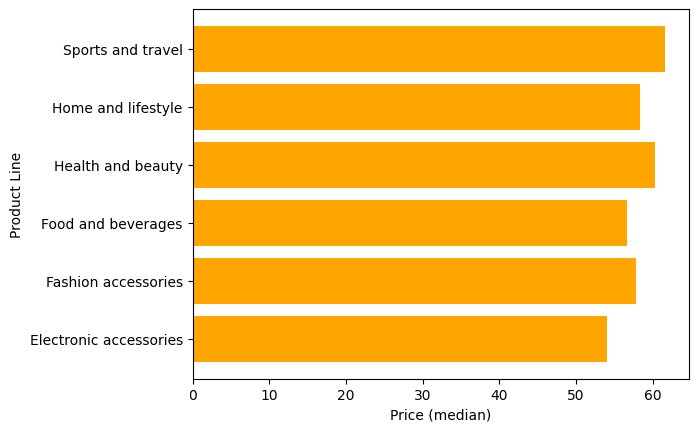

In [11]:
pl = price_per_product_line.product_line
mup = price_per_product_line.median_unit_price
plt.barh(pl, mup, color=['orange']);

# Alternative Plot 1
# price_per_product_line.plot.barh(x='product_line', y='median_unit_price', color=['orange'])

# Alternative Plot 2
#price_per_product_line.plot(x='product_line', y='median_unit_price', color=['orange'], kind='barh')

plt.xlabel('Price (median)')
plt.ylabel('Product Line');

### Histogram

To make sure that nothing is fishy with the data. We want to visualize exactly how the total sales is distributed in the city of Yangon. In this case, without using any kind of aggregation, we would like to know if in the city of Yangon there are more sales happening with values closer to the values {100, 200, 300, 400, 500}.

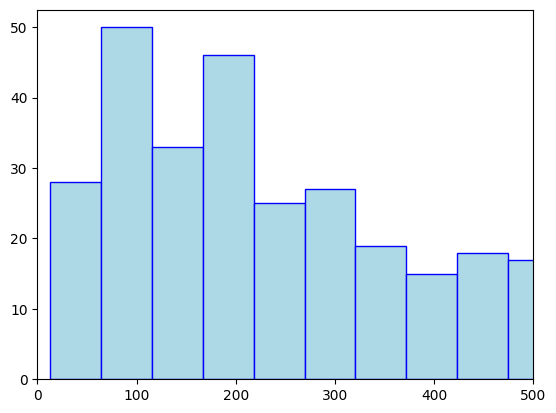

In [12]:
yangon_sales = supermarket_sales[supermarket_sales['city'] == 'Yangon']
total = yangon_sales.total
plt.hist(total, color=['lightblue'], bins=20, edgecolor='blue')
plt.xlim(0,500);

# yangon_sales.total.plot.hist(xlim=(0, 500), color=['lightblue'], bins=20, edgecolor='blue')

# Alternative Plot
#yangon_sales.total.plot(xlim=(0, 500), color=['lightblue'], bins=20, kind='hist', edgecolor='blue')


### Boxplot

To compare how a variable is distributed among different groups. Now, we will analyze the types of payment and check these statistics for the payments made.

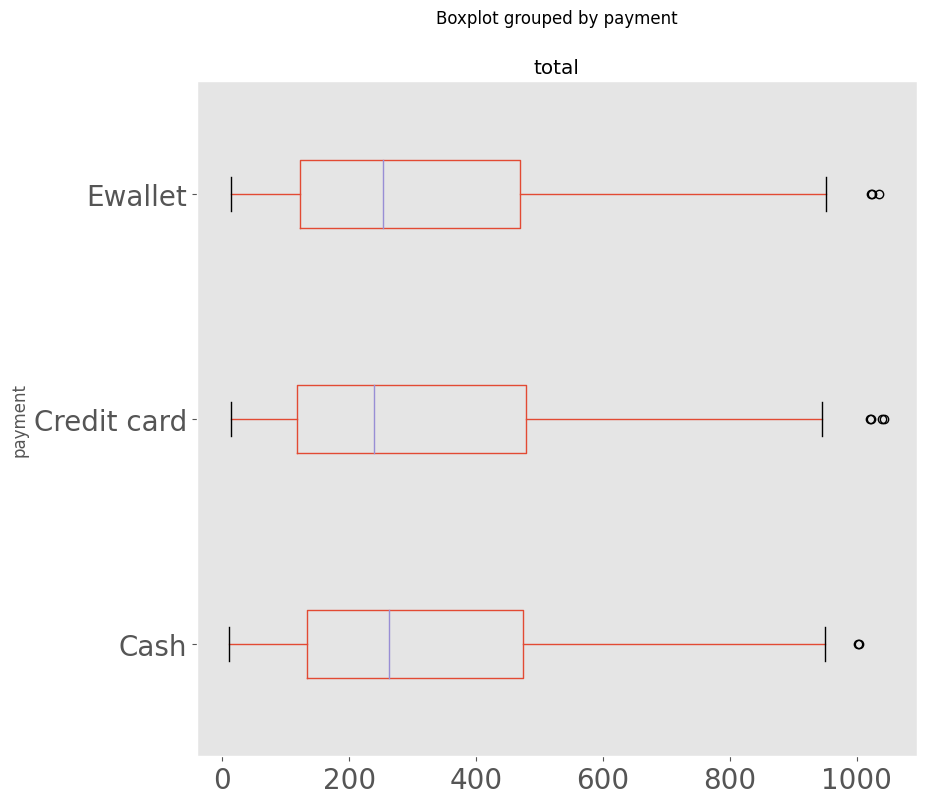

In [13]:
#clear the old style
plt.style.use('default')

# use a new style
plt.style.use("ggplot")

supermarket_sales.boxplot(
    column='total', 
    by='payment', 
    vert=False,
    figsize=(9,9), 
    grid=False,
    fontsize=20,
);